<a href="https://colab.research.google.com/github/Echevarriaj93/Data_in_Motion_weeklies/blob/main/usa_housing_listing_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **USA Housing Listings**


## In this project we observe and analyze the USA housing Listings (rentals) dataset from Kaggle. We will fromulate questions that interest us about the data and that might help organizations identify investment opportunities.



**Details form Kaggle:**

About Dataset
Context
Craigslist is the world's largest collection of privately sold housing options, yet it's very difficult to collect all of them in the same place. I built this dataset as a means in by which to perform experimental analysis on the United States states as a whole instead of isolated urban housing markets.

Content
This data is scraped every few months, it contains most all relevant information that Craigslist provides on retail sales

Source: https://www.kaggle.com/datasets/austinreese/usa-housing-listings


In [2]:
#importing dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




# **Importing the Data**

In [3]:
#importing as csv

data = pd.read_csv('/content/drive/MyDrive/housing.csv')

data.head()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7049044568,https://reno.craigslist.org/apa/d/reno-beautif...,reno / tahoe,https://reno.craigslist.org,1148,apartment,1078,3,2.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/01616_daghmBUvTC...,Ridgeview by Vintage is where you will find al...,39.5483,-119.796,ca
1,7049047186,https://reno.craigslist.org/apa/d/reno-reduced...,reno / tahoe,https://reno.craigslist.org,1200,condo,1001,2,2.0,0,...,0,0,0,w/d hookups,carport,https://images.craigslist.org/00V0V_5va0MkgO9q...,Conveniently located in the middle town of Ren...,39.5026,-119.789,ca
2,7043634882,https://reno.craigslist.org/apa/d/sparks-state...,reno / tahoe,https://reno.craigslist.org,1813,apartment,1683,2,2.0,1,...,0,0,0,w/d in unit,attached garage,https://images.craigslist.org/00t0t_erYqC6LgB8...,2BD | 2BA | 1683SQFTDiscover exceptional servi...,39.6269,-119.708,ca
3,7049045324,https://reno.craigslist.org/apa/d/reno-1x1-fir...,reno / tahoe,https://reno.craigslist.org,1095,apartment,708,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00303_3HSJz75zlI...,MOVE IN SPECIAL FREE WASHER/DRYER WITH 6 OR 12...,39.4477,-119.771,ca
4,7049043759,https://reno.craigslist.org/apa/d/reno-no-long...,reno / tahoe,https://reno.craigslist.org,289,apartment,250,0,1.0,1,...,1,0,1,laundry on site,NaN,https://images.craigslist.org/01616_fALAWFV8zQ...,"Move In Today: Reno Low-Cost, Clean & Furnishe...",39.5357,-119.805,ca


## **Initial Observations**

## The dataset shows some valuable information about living spaces and their features such as laundry, parking, square footage, bedrooms, pets allowed etc.

#Naturally, the most resonable target variable is price

#We mainly want to observe how the other features affect price and throw in other factors such as location.

In [4]:
#Rows and columns

data.shape #384977 rows, 22 columns

(384977, 22)

In [5]:
data.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'type', 'sqfeet', 'beds',
       'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'laundry_options', 'parking_options', 'image_url', 'description', 'lat',
       'long', 'state'],
      dtype='object')

In [6]:
#Summary Statistics

data.describe()

,id,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,3.849770e+05,3.849770e+05,3.849770e+05,384977.000000,384977.000000,384977.000000,384977.000000,384977.000000,384977.000000,384977.000000,384977.000000,383059.000000,383059.000000
mean,7.040982e+09,8.825722e+03,1.059900e+03,1.905345,1.480718,0.726890,0.707918,0.731771,0.082111,0.012871,0.048128,37.233487,-92.700631
std,8.800376e+06,4.462200e+06,1.915076e+04,3.494572,0.618061,0.445557,0.454721,0.443038,0.274535,0.112718,0.214036,5.546171,16.531980
min,7.003808e+09,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-43.533300,-163.894000
25%,7.035979e+09,8.050000e+02,7.500000e+02,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.454700,-100.775000
50%,7.043320e+09,1.036000e+03,9.490000e+02,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,37.647800,-87.745100
75%,7.048426e+09,1.395000e+03,1.150000e+03,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,41.138300,-81.179600
max,7.051292e+09,2.768307e+09,8.388607e+06,1100.000000,75.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,102.036000,172.633000


In [7]:
#price has a lot of 0 values which are not helpful. Rent/mortgages cost money.
# we will drop anything below $500

data  = data[data['price'] >= 500]


data['price'].sort_values()

368905           500
90851            500
235641           500
235642           500
26091            500
             ...    
37586       12000000
211107      18502000
211106      18502000
372726      21701907
74809     2768307249
Name: price, Length: 375083, dtype: int64

In [8]:
# Most states have adopted building and zoning codes from the 
#International Residential Code (IRC). The IRC codes require 
#that all homes must be built on a minimum of 320 square feet.

data  = data[data['sqfeet'] >= 700] #going to raise this to avg sqfeet/reaosonable

data['sqfeet'].sort_values()

57783         700
170677        700
170680        700
43886         700
85686         700
           ...   
140646     999999
6607      1019856
6608      1019856
356695    8000000
159607    8388607
Name: sqfeet, Length: 311640, dtype: int64

In [9]:
# We only want to consider apartments with at least 1 bed

data = data[data['beds'] >= 1]



# **1. Cleaning the Data**

In [10]:
#We will use a copy of the data to make any changes for analysis

df = data.copy()

## 1.1 Data Types

In [11]:
#Column names and data types of the values

df.dtypes #the data types seem to be in favorable forms

id                           int64
url                         object
region                      object
region_url                  object
price                        int64
type                        object
sqfeet                       int64
beds                         int64
baths                      float64
cats_allowed                 int64
dogs_allowed                 int64
smoking_allowed              int64
wheelchair_access            int64
electric_vehicle_charge      int64
comes_furnished              int64
laundry_options             object
parking_options             object
image_url                   object
description                 object
lat                        float64
long                       float64
state                       object
dtype: object

## 1.2 Dealing with NaN values

###When dealing with NaN values we had 4 options



In [12]:
## Option 1: Drop all NaN values. We would still have over 200k rows well over minimum required

df.dropna(how='any').shape

(191414, 22)

In [13]:
## Option 2: Replace missing values with the most frequent value:
# w/d in unit is most common but it is highly skewed

df['laundry_options'].value_counts()

df['laundry_options'].fillna('w/d in unit' ).value_counts() #Likely a false representation of the reality


w/d in unit           178522
w/d hookups            69134
laundry on site        36603
laundry in bldg        24914
no laundry on site      1847
Name: laundry_options, dtype: int64

In [14]:
## Option 3: Use a classification model to predict the missing values based on other features

####Out of the scope of this class. May not really gain us any extra points####

#Classification model with 3 neighbers yielded 73% accuraccy on the test data.

df_cat = df.dropna(how='any')

#No. I believe Washer and Dryer are too important of a feature to dismiss.

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

X = df_cat[['price', 'sqfeet', 'beds', 'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed','wheelchair_access', 'electric_vehicle_charge', 'comes_furnished']]

y = df_cat['laundry_options']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)



for n in range(2,13):
    KNN = KNeighborsClassifier(n_neighbors=n)

    KNN.fit(X_train, y_train)
    
    #predicting the y values with the test features
    y_pred = KNN.predict(X_test)
    
    #R2 score
    print("n_neighbors =", n)
    print('train, test scores')
    print(KNN.score(X_train, y_train))
    print(KNN.score(X_test, y_test))
    print()

n_neighbors = 2
train, test scores
0.864807753787613
0.7199645384457074

n_neighbors = 3
train, test scores
0.845360905128385
0.7390567859800212

n_neighbors = 4
train, test scores
0.8198866250282658
0.729368182753653

n_neighbors = 5
train, test scores
0.8052741974471138
0.7262811278040749

n_neighbors = 6
train, test scores
0.7887747861548419
0.7188405338230405

n_neighbors = 7
train, test scores
0.7777257947554329
0.7171941045165988

n_neighbors = 8
train, test scores
0.7664272848487684
0.7117323919134991

n_neighbors = 9
train, test scores
0.7572340873470724
0.7072522044738551

n_neighbors = 10
train, test scores
0.7487270657403292
0.7006348251460415

n_neighbors = 11
train, test scores
0.7412960926961254
0.6965979071350547

n_neighbors = 12
train, test scores
0.735065927468089
0.692497664919974



In [15]:
#Option 4: Drop the columns

#We find that the Laundry and Parking columns would be too important of features to drop

## We will proceed with option 1. Dropping all rows with NaN values. We will still have 240k rows of data to work with.

In [16]:
#The data was yet to be chnaged so we are ready to proceed
df.shape

(311020, 22)

In [17]:
#Dropping all rows with any NaN values
df.dropna(how='any', inplace= True)

df.shape

(191414, 22)

## 1.3 Dealing with Duplicates

In [18]:
# No dupes!!!

data.duplicated().sum()

0

# **2. Outliers**

## 2.1 Identifying numeric columns and whihc ones will help with outlier detection

In [19]:
#This will select columns where numeric types are detected

numtypes = df.select_dtypes(include='number')

#We get a list of numerical columns
numtypes.columns

Index(['id', 'price', 'sqfeet', 'beds', 'baths', 'cats_allowed',
       'dogs_allowed', 'smoking_allowed', 'wheelchair_access',
       'electric_vehicle_charge', 'comes_furnished', 'lat', 'long'],
      dtype='object')

In [20]:
#Some numerical data is categorical such as 'cats_allowed',
#'dogs_allowed', 'smoking_allowed', 'wheelchair_access',
#'electric_vehicle_charge', 'comes_furnished'.

#In additional lattitude and longitude are locational data.

#None of the above are useful for outlier detection

numtypes.head()

,id,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
0,7049044568,1148,1078,3,2.0,1,1,0,0,0,0,39.5483,-119.796
1,7049047186,1200,1001,2,2.0,0,0,0,0,0,0,39.5026,-119.789
2,7043634882,1813,1683,2,2.0,1,1,1,0,0,0,39.6269,-119.708
3,7049045324,1095,708,1,1.0,1,1,1,0,0,0,39.4477,-119.771
7,7049041899,1095,708,1,1.0,1,1,1,0,0,0,39.4477,-119.771


In [21]:
df['beds'] = df['beds'].astype('int64')

In [22]:
df['beds'].min()


1

## 2.2 Visualizing the Outliers in each column that concerns us

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Number of Baths')

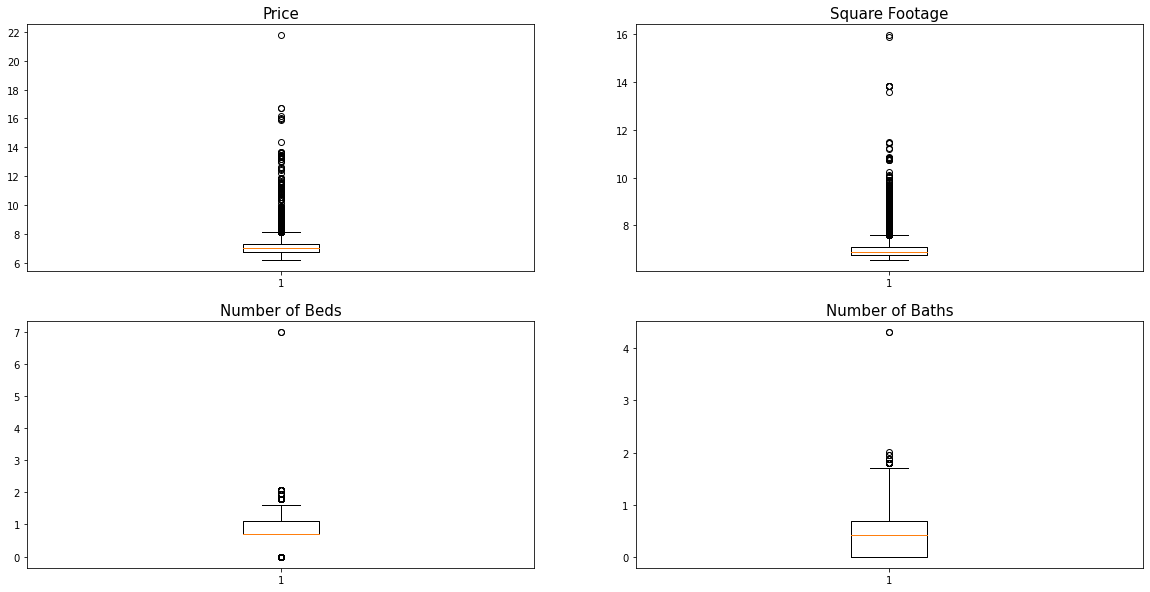

In [23]:
#We can now use the appropriate columns to detect outliers

fig, ((ax1,ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey=False, figsize=(20, 10))

#Use np.log to better visualize the outliers since some of the values are 
#extremely out of range of the 75 percentile
ax1.boxplot(np.log(df['price']))
ax1.set_title('Price', fontsize=15)



ax2.boxplot(np.log(df['sqfeet']))
ax2.set_title('Square Footage', fontsize=15)


ax3.boxplot(np.log(df['beds']))
ax3.set_title('Number of Beds', fontsize=15)

ax4.boxplot(np.log(df['baths']))
ax4.set_title('Number of Baths', fontsize=15)

# df[['price', 'sqfeet', 'beds', 'baths']].plot(kind='box', figsize=(20,20))

In [24]:
df['beds'].astype('int64')

0         3
1         2
2         2
3         1
7         1
         ..
384970    2
384972    2
384974    2
384975    2
384976    2
Name: beds, Length: 191414, dtype: int64

In [25]:
#Max values of the Outlir columns

# df['beds'].max() #1100 Beds is very unusual. Might be an entire building
#df['baths'].max() #75 baths
#df['sqfeet'].max() #8388607sqft
# df['price'].max() #$ 2,768,307,249 almost $3bil

numtypes[['price', 'sqfeet', 'beds', 'baths']].describe() #We can see in the summary stats that the max values for
#columns that concern us are way above the range in the 75th percentile



,price,sqfeet,beds,baths
count,1.914140e+05,1.914140e+05,191414.000000,191414.000000
mean,1.633042e+04,1.221000e+03,2.131918,1.575426
std,6.327854e+06,2.705406e+04,3.634449,0.636645
min,5.000000e+02,7.000000e+02,1.000000,0.000000
25%,8.750000e+02,8.550000e+02,2.000000,1.000000
50%,1.121000e+03,1.000000e+03,2.000000,1.500000
75%,1.502000e+03,1.200000e+03,3.000000,2.000000
max,2.768307e+09,8.388607e+06,1100.000000,75.000000


In [26]:
df['sqfeet'].sort_values()

8250          700
213204        700
356602        700
285544        700
216329        700
           ...   
140646     999999
6607      1019856
6608      1019856
356695    8000000
159607    8388607
Name: sqfeet, Length: 191414, dtype: int64

## 2.3 Function for replacing outlier with upper and lower bound values

In [27]:
def outlier_replace(col):
  '''
  # This function takes a series (column)
  and replaces detected outliers with the 
  lower and uper bounds of the data.
  ---
  Input:
  col(float or int): A column of choice either 
  int or float.
  ---
  Output:
  The column with the outlier values replaced
  with lower and upper bound values of the date
  '''
  q1 = np.quantile(col, .25) #1st quantile
  q3 = np.quantile(col, .75) #3rd quantile

  iqr = q3 - q1 #The interquartile range. The middle 50% of the observations

  bound_lower = q1 - 1.5 * iqr #lower bounds
  bound_upper = q3 + 1.5 * iqr #upper bounds

  #replace values below the lower bounds with the lower bound value
  col = np.where(col < bound_lower, bound_lower, col) 

  #replace values above the upper bounds with the upper bound value
  col = np.where(col > bound_upper, bound_upper, col)


  return  col 

In [28]:
# Applying the function to the columns that concern us

df['price'] = outlier_replace(df['price'])

df['sqfeet'] = outlier_replace(df['sqfeet'])

df[ 'beds'] = outlier_replace(df[ 'beds'])

df['baths'] = outlier_replace(df['baths'])


Text(0.5, 1.0, 'Number of Baths')

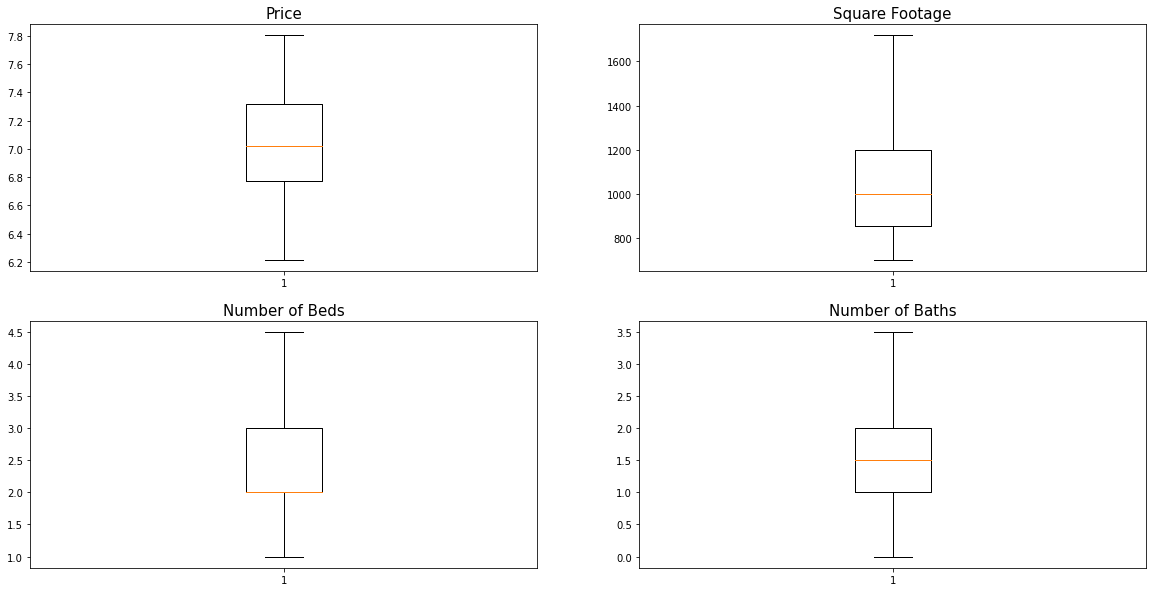

In [29]:
fig, ((ax1,ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey=False, figsize=(20, 10))

#Use np.log to better visualize the outliers since some of the values are 
#extremely out of range of the 75 percentile
ax1.boxplot(np.log(df['price']))
ax1.set_title('Price', fontsize=15)



ax2.boxplot(df['sqfeet'])
ax2.set_title('Square Footage', fontsize=15)


ax3.boxplot(df['beds'])
ax3.set_title('Number of Beds', fontsize=15)

ax4.boxplot(df['baths'])
ax4.set_title('Number of Baths', fontsize=15)

In [30]:
#There are still outliers in sqfeet. 
df['sqfeet'].sort_values()

8250       700.0
213204     700.0
356602     700.0
285544     700.0
216329     700.0
           ...  
159744    1717.5
159754    1717.5
26992     1717.5
27031     1717.5
116023    1717.5
Name: sqfeet, Length: 191414, dtype: float64

In [31]:
# The most frequent square footage
df['sqfeet'].mode()

0    1717.5
dtype: float64

In [32]:
#The bottom 25% fall in this range
sqft_q1 = np.quantile(df['sqfeet'], .25)
sqft_q3 = np.quantile(df['sqfeet'], .75)

sq_iqr = sqft_q3 - sqft_q1

sqft_low_bound = sqft_q1 - 1.5 * sq_iqr

sqft_low_bound

337.5

In [33]:
# We can keep the values shown as outliers. They are all above the lower bounds

df['sqfeet'].apply(lambda x : x >= 152.5).value_counts()



True    191414
Name: sqfeet, dtype: int64

In [34]:
#We are left with 230k rows of data after cleaning
df.shape

(191414, 22)

# **3. Analysis**

In [35]:
df.head()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7049044568,https://reno.craigslist.org/apa/d/reno-beautif...,reno / tahoe,https://reno.craigslist.org,1148.0,apartment,1078.0,3.0,2.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/01616_daghmBUvTC...,Ridgeview by Vintage is where you will find al...,39.5483,-119.796,ca
1,7049047186,https://reno.craigslist.org/apa/d/reno-reduced...,reno / tahoe,https://reno.craigslist.org,1200.0,condo,1001.0,2.0,2.0,0,...,0,0,0,w/d hookups,carport,https://images.craigslist.org/00V0V_5va0MkgO9q...,Conveniently located in the middle town of Ren...,39.5026,-119.789,ca
2,7043634882,https://reno.craigslist.org/apa/d/sparks-state...,reno / tahoe,https://reno.craigslist.org,1813.0,apartment,1683.0,2.0,2.0,1,...,0,0,0,w/d in unit,attached garage,https://images.craigslist.org/00t0t_erYqC6LgB8...,2BD | 2BA | 1683SQFTDiscover exceptional servi...,39.6269,-119.708,ca
3,7049045324,https://reno.craigslist.org/apa/d/reno-1x1-fir...,reno / tahoe,https://reno.craigslist.org,1095.0,apartment,708.0,1.0,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00303_3HSJz75zlI...,MOVE IN SPECIAL FREE WASHER/DRYER WITH 6 OR 12...,39.4477,-119.771,ca
7,7049041899,https://reno.craigslist.org/apa/d/reno-1x1-fir...,reno / tahoe,https://reno.craigslist.org,1095.0,apartment,708.0,1.0,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00303_3HSJz75zlI...,MOVE IN SPECIAL FREE WASHER/DRYER WITH 6 OR 12...,39.4477,-119.771,ca


In [36]:
df[['price', 'beds', 'baths', 'sqfeet']].corr()

,price,beds,baths,sqfeet
price,1.000000,0.203013,0.317967,0.373913
beds,0.203013,1.000000,0.585913,0.732638
baths,0.317967,0.585913,1.000000,0.644425
sqfeet,0.373913,0.732638,0.644425,1.000000


In [37]:
df['top10'] = df['state'].value_counts()

df['top10']

0        NaN
1        NaN
2        NaN
3        NaN
7        NaN
          ..
384970   NaN
384972   NaN
384974   NaN
384975   NaN
384976   NaN
Name: top10, Length: 191414, dtype: float64

In [38]:
df['sqft_cat'] = pd.cut(df['sqfeet'], 5, precision=0)

df['sqft_cat'].unique()

[(904.0, 1107.0], (1514.0, 1718.0], (699.0, 904.0], (1107.0, 1310.0], (1310.0, 1514.0]]
Categories (5, interval[float64, right]): [(699.0, 904.0] < (904.0, 1107.0] < (1107.0, 1310.0] <
                                           (1310.0, 1514.0] < (1514.0, 1718.0]]

## 3.1 Top 10 Average rents by State

In [39]:
#top 10 state by average price
df.groupby('state')['price'].mean().sort_values(ascending=False).head(10)

state
hi    2165.056625
dc    1894.930049
ma    1833.252872
ca    1796.363456
nj    1723.959268
nh    1705.447170
ri    1636.715368
co    1600.306074
vt    1566.315508
wa    1517.111642
Name: price, dtype: float64

## 3.2 Highest Rent?

Text(0, 0.5, 'Avg Rent')

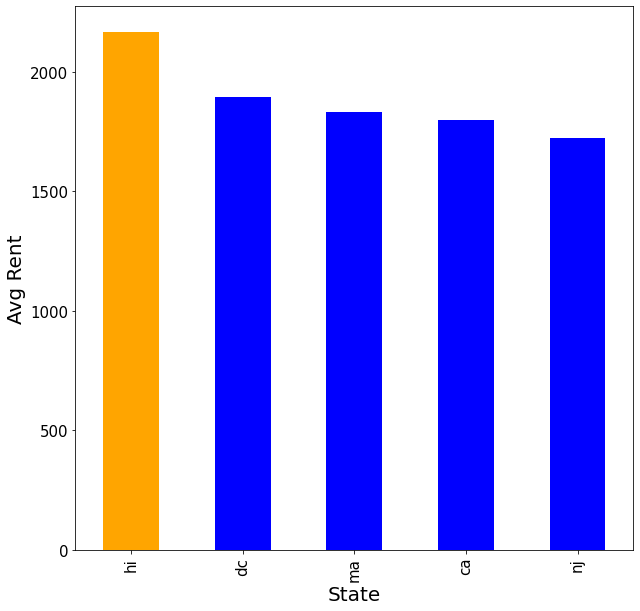

In [40]:
df.groupby('state')['price'].mean().sort_values(ascending=False).head().plot(kind='bar', figsize=(10,10), color=['orange', 'blue', 'blue', 'blue','blue'])
plt.xlabel('State', fontsize=20)
plt.ylabel('Avg Rent', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Avg Rent')

## 3.3 Lowest Rent AVG?

Text(0, 0.5, 'Avg Rent')

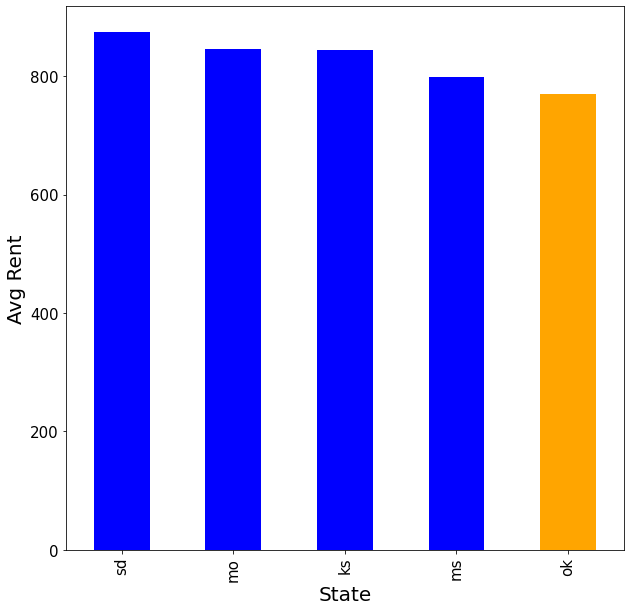

In [41]:
df.groupby('state')['price'].mean().sort_values(ascending=False).tail().plot(kind='bar', figsize=(10,10), color=['blue', 'blue', 'blue', 'blue','orange'])
plt.xlabel('State', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Avg Rent', fontsize=20)
plt.ylabel('Avg Rent')

## 3.4 Relationship between price and square footage

In [42]:
df[['price', 'sqfeet']].corr() #prices vary dratically acroos the country and likely is 
#producing noise

,price,sqfeet
price,1.000000,0.373913
sqfeet,0.373913,1.000000


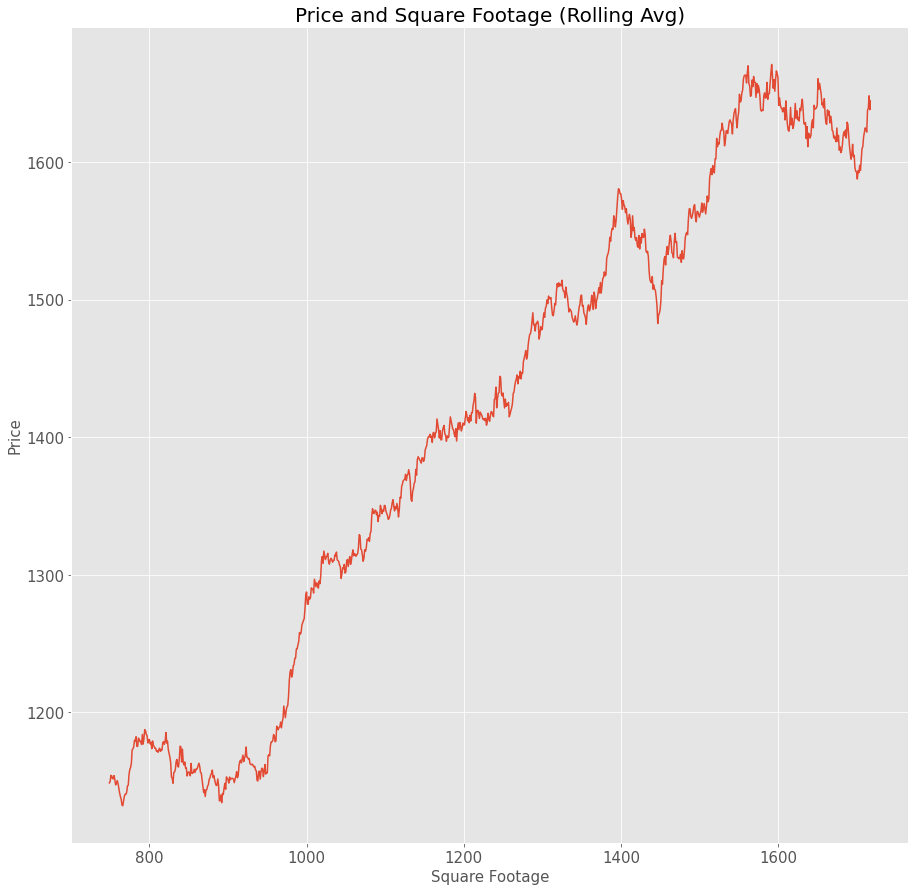

In [70]:
#This plot is to illustrate the trend. We found that there were too many trends to plot
#and resorted to using a rolling average of the average.


grouped = df.groupby('sqfeet')['price'].mean().rolling(50).mean() #We need the mean function to plot this
#But we also need to declare the rolling average because there are too many mean values to plot
#and plot the trend.

x = grouped.index.values #the groupby column is the index. 
#We want the values of the index column which represent sqfeet

y = grouped.values #price


plt.figure(figsize=(15,15))
plt.plot(x,y)

plt.title('Price and Square Footage (Rolling Avg)', fontsize=20)
plt.xlabel('Square Footage', fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.yticks(fontsize=15)
plt.style.use('ggplot')




### There is a correlation between square footage and price.

## 3.5 Average Price of Smoking vs No Smoking 

In [44]:
df['smoking_status'] = np.where(df['smoking_allowed'] == 0 , 'no', 'yes')

In [45]:
df.pivot_table(index=['smoking_status'], values='price', aggfunc='mean')

,price
smoking_status,
no,1381.921923
yes,1176.744694


(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.]),
 <a list of 9 Text major ticklabel objects>)

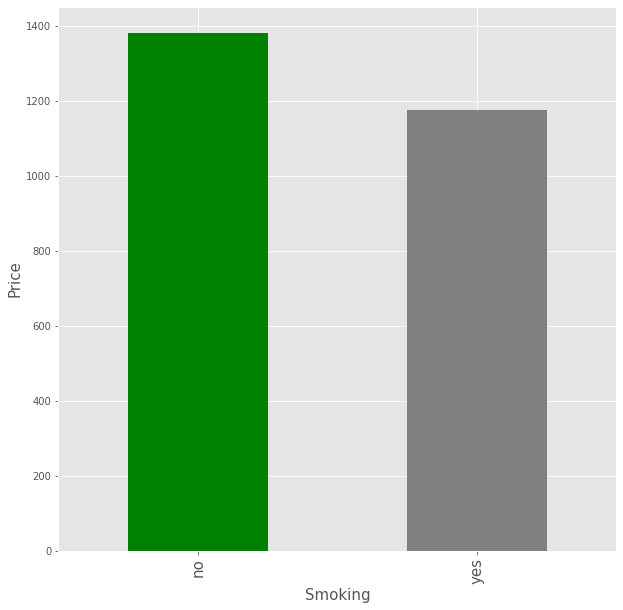

In [71]:
df.groupby('smoking_status')['price'].mean().plot(kind='bar', color=['green', 'grey'], figsize=(10,10))
plt.xlabel('Smoking', fontsize=15)
plt.xticks(fontsize=15)

plt.ylabel('Price', fontsize=15)
plt.yticks(fontsize=10)

## 3.6 Does the amount of listings in a State effect Price?

In [47]:
#Over 20% of the properties listed are in CA, FL, Texas, 3 of the largest most populated states

round(df['state'].value_counts() * 100/ len(df), 2).head(10)

ca    10.01
fl     6.90
tx     6.09
mi     4.42
nc     4.06
oh     3.80
ny     3.23
ga     2.84
or     2.83
va     2.81
Name: state, dtype: float64

## Number of Listings per State

In [48]:
df['state'].value_counts()

ca    19166
fl    13217
tx    11656
mi     8465
nc     7779
oh     7273
ny     6174
ga     5429
or     5423
va     5374
il     5319
co     5087
tn     5063
pa     4957
mn     4520
wi     4322
ia     4187
ks     4162
al     4128
wa     4080
sc     3957
az     3279
nj     3253
la     3190
id     3060
ma     2873
in     2802
ok     2683
ut     2646
ms     2278
md     2239
ky     2216
nd     2208
ct     2111
ne     1687
nv     1586
ar     1480
ri     1386
nh     1325
sd     1284
ak     1265
nm     1207
dc     1015
mo     1014
hi      883
mt      844
de      624
wv      400
vt      374
me      324
wy      140
Name: state, dtype: int64

In [49]:
#Spliting amouns of listing into categories: high and low.

over_5k = df['state'].value_counts()[:14].index

In [50]:
#Testing of number of listings affects price

#Create category columns for number of properties listed

boolnames = df['state'].isin(over_5k)

df['property_count_cat'] = np.where(boolnames == True, 'High', 'Low')





In [51]:
high_prop, low_prop = df[df['property_count_cat'] == 'High'], df[df['property_count_cat'] == 'Low']

high_prop.shape, low_prop.shape

((110382, 26), (81032, 26))

In [52]:
high_prop_sample = high_prop.sample(n=81032, random_state=42)

high_prop_sample.shape

(81032, 26)

In [53]:
from scipy import stats


high_property = high_prop_sample['price']

low_property = low_prop['price']

t2, p2 = stats.ttest_ind(high_property,low_property)
print("t = " + str(t2))

#if p < 0.05 we can reject the null hypothesis
print("p = " + str(p2)) #the null hyptohesis assumes paid classes make no difference


t = 34.82393971194497
p = 1.013382294678875e-264


### No correlation between amount of properties in the data set and the price.

## Our P-value shows we can not reject the null hypothesis

## 3.7 Relationship between laundry options and price

In [54]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'type', 'sqfeet', 'beds',
       'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'laundry_options', 'parking_options', 'image_url', 'description', 'lat',
       'long', 'state', 'top10', 'sqft_cat', 'smoking_status',
       'property_count_cat'],
      dtype='object')

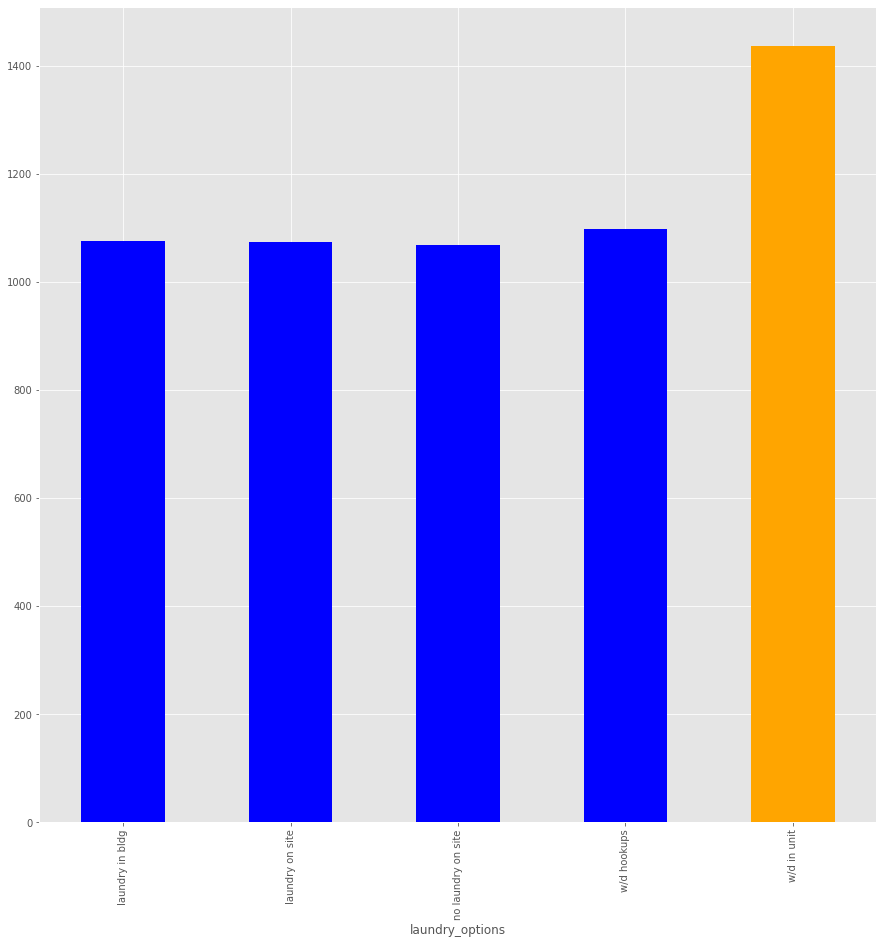

In [55]:
df.groupby('laundry_options')['price'].mean().plot(kind='bar', figsize=(15,15), color=['blue', 'blue','blue','blue', 'orange'])

## 

In [56]:
df['top_or_other'] = np.where(boolnames == False, 'Other', df['state'])

df['top_or_other'].head()

0    ca
1    ca
2    ca
3    ca
7    ca
Name: top_or_other, dtype: object

In [57]:
pd.crosstab(index=df['top_or_other'], columns=df['laundry_options'], normalize='index').round(2)

laundry_options,laundry in bldg,laundry on site,no laundry on site,w/d hookups,w/d in unit
top_or_other,,,,,
Other,0.13,0.15,0.01,0.21,0.50
ca,0.06,0.23,0.00,0.17,0.53
co,0.07,0.13,0.00,0.12,0.67
fl,0.03,0.14,0.00,0.29,0.54
ga,0.01,0.09,0.00,0.65,0.25
il,0.23,0.12,0.01,0.20,0.44
mi,0.30,0.08,0.01,0.20,0.41
nc,0.02,0.11,0.02,0.51,0.34
ny,0.27,0.10,0.04,0.17,0.41


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 <a list of 7 Text major ticklabel objects>)

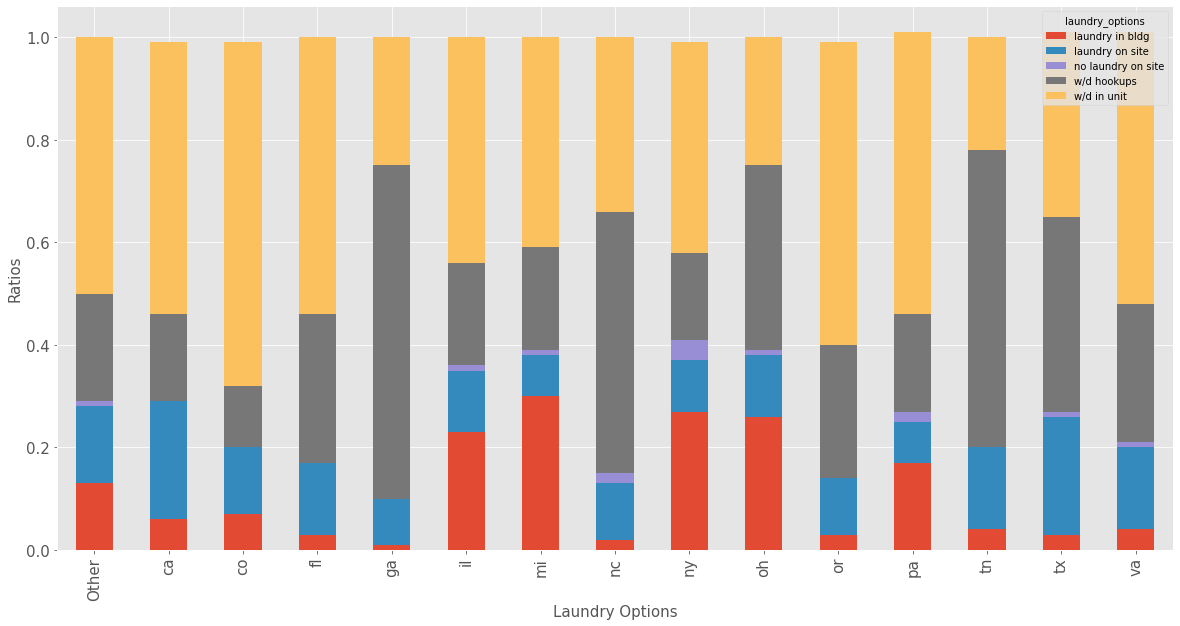

In [58]:
pd.crosstab(index=df['top_or_other'], columns=df['laundry_options'], normalize='index').round(2).plot(kind='bar', stacked=True, figsize=(20,10))
plt.xlabel('Laundry Options', fontsize=15)
plt.ylabel('Ratios', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

## 3.8 What type of living spaces do we have and wat is the ratio?



In [59]:
df.head()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,image_url,description,lat,long,state,top10,sqft_cat,smoking_status,property_count_cat,top_or_other
0,7049044568,https://reno.craigslist.org/apa/d/reno-beautif...,reno / tahoe,https://reno.craigslist.org,1148.0,apartment,1078.0,3.0,2.0,1,...,https://images.craigslist.org/01616_daghmBUvTC...,Ridgeview by Vintage is where you will find al...,39.5483,-119.796,ca,NaN,"(904.0, 1107.0]",no,High,ca
1,7049047186,https://reno.craigslist.org/apa/d/reno-reduced...,reno / tahoe,https://reno.craigslist.org,1200.0,condo,1001.0,2.0,2.0,0,...,https://images.craigslist.org/00V0V_5va0MkgO9q...,Conveniently located in the middle town of Ren...,39.5026,-119.789,ca,NaN,"(904.0, 1107.0]",no,High,ca
2,7043634882,https://reno.craigslist.org/apa/d/sparks-state...,reno / tahoe,https://reno.craigslist.org,1813.0,apartment,1683.0,2.0,2.0,1,...,https://images.craigslist.org/00t0t_erYqC6LgB8...,2BD | 2BA | 1683SQFTDiscover exceptional servi...,39.6269,-119.708,ca,NaN,"(1514.0, 1718.0]",yes,High,ca
3,7049045324,https://reno.craigslist.org/apa/d/reno-1x1-fir...,reno / tahoe,https://reno.craigslist.org,1095.0,apartment,708.0,1.0,1.0,1,...,https://images.craigslist.org/00303_3HSJz75zlI...,MOVE IN SPECIAL FREE WASHER/DRYER WITH 6 OR 12...,39.4477,-119.771,ca,NaN,"(699.0, 904.0]",yes,High,ca
7,7049041899,https://reno.craigslist.org/apa/d/reno-1x1-fir...,reno / tahoe,https://reno.craigslist.org,1095.0,apartment,708.0,1.0,1.0,1,...,https://images.craigslist.org/00303_3HSJz75zlI...,MOVE IN SPECIAL FREE WASHER/DRYER WITH 6 OR 12...,39.4477,-119.771,ca,NaN,"(699.0, 904.0]",yes,High,ca


In [60]:
df['type'].describe()

count        191414
unique           12
top       apartment
freq         144823
Name: type, dtype: object

In [61]:
df.pivot_table(index='type', values='price', aggfunc='mean').sort_values('price', ascending=False)

,price
type,
assisted living,2442.500000
flat,1596.336043
condo,1573.574659
house,1455.204542
loft,1449.750000
in-law,1356.965517
cottage/cabin,1353.218101
townhouse,1305.345473
duplex,1248.779610


In [62]:
df['type'].value_counts() 

apartment          144823
house               21223
townhouse           12548
duplex               4154
condo                3958
manufactured         3506
loft                  436
flat                  369
cottage/cabin         337
in-law                 58
assisted living         1
land                    1
Name: type, dtype: int64

In [63]:
df['type'].value_counts() * 100/ len(df) #ratio of distribution of values

apartment          75.659565
house              11.087486
townhouse           6.555424
duplex              2.170165
condo               2.067769
manufactured        1.831632
loft                0.227779
flat                0.192776
cottage/cabin       0.176058
in-law              0.030301
assisted living     0.000522
land                0.000522
Name: type, dtype: float64

In [64]:
df['type'].unique()

array(['apartment', 'condo', 'house', 'duplex', 'townhouse',
       'manufactured', 'flat', 'loft', 'cottage/cabin', 'in-law',
       'assisted living', 'land'], dtype=object)

Text(0.5, 1.0, 'Price Distribution by Housing Type')

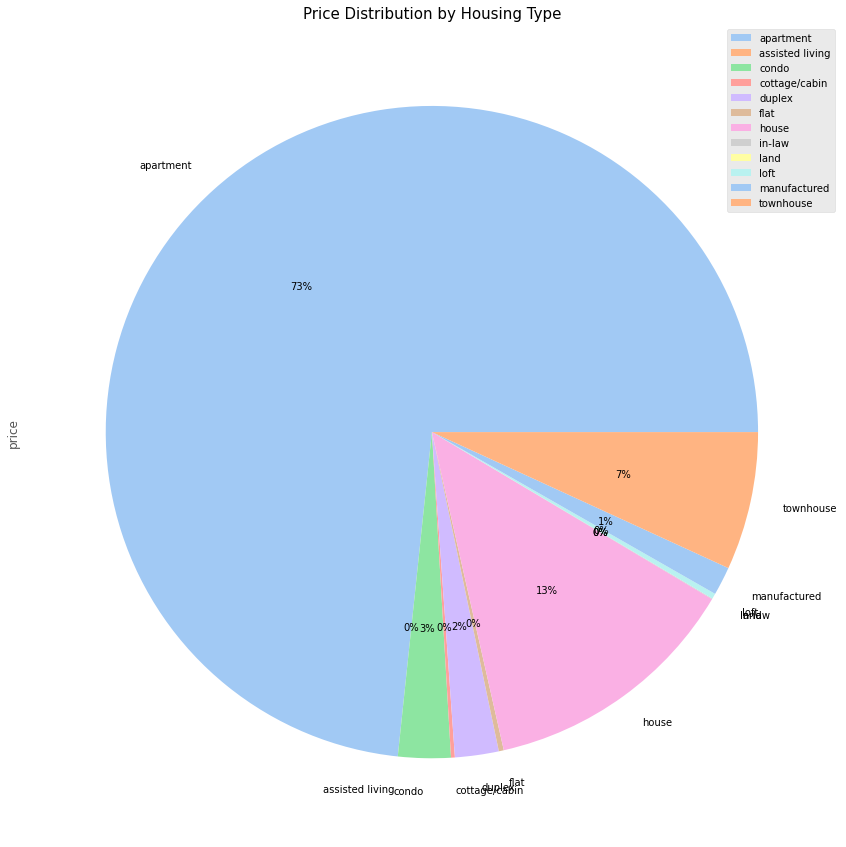

In [66]:

palette_color = sns.color_palette('pastel')[:13]

df.groupby('type').sum().plot.pie(y='price', figsize=(15,15), colors=palette_color, autopct='%1.0f%%')
plt.title('Price Distribution by Housing Type', fontsize=15)

# explode = [0, 0.1, 0, 0, 0]





# tips.groupby('day').sum().plot.pie(y='tip', figsize= (10,10), autopct='%1.0f%%')
# plt.title('Pie Chart of Tip Distribution by Day')

## 3.9 Can we make a city column and observe distributions that way?

In [67]:
df['city'] = df['url'].apply(lambda x: x.split('.')[0][8:])

df['city'].head()

0    reno
1    reno
2    reno
3    reno
7    reno
Name: city, dtype: object

In [68]:
df['city'].value_counts()

omaha          1712
spokane        1603
lincoln        1602
minneapolis    1574
stlouis        1554
               ... 
bigbend           3
susanville        3
elko              2
nwks              1
csd               1
Name: city, Length: 413, dtype: int64

In [69]:
df['location'] = df[['city', 'state']].apply(', '.join, axis=1)

df['location'].value_counts()

omaha, ia          1710
lincoln, ne        1599
minneapolis, mn    1574
spokane, id        1560
stlouis, il        1548
                   ... 
csd, sd               1
wheeling, wv          1
huntington, wv        1
grandforks, mn        1
ogden, nv             1
Name: location, Length: 444, dtype: int64

### The city data is not reliable. It is still based on region whihc overlaps. Some listings are inlcuding the names of more popular living desrtinations as to say they are in the same general area.